In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
CaseNames_Base = ["IEEE118_mod2","IEEE118_mod1"]
#CaseNames_Base = ["RTS24_mod2","RTS24_mod1"]
CaseNames_ByStages = [CaseName_Base + '_ByStages_nc' for CaseName_Base in CaseNames_Base]


Folder_A = 'A.The_full_year_MILP'
Folder_B = 'B.Operation_cost'
Folder_D = 'D.Representative_days_based_on_RES_and_Demand'
Folder_E = 'E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_F = 'F.Representative_days_based_on_Line_Benefit_NN_OC_fy_1'
Folder_G = 'G.Representative_days_based_on_Line_Benefit_NN_OC_fy_2'
Folder_K = 'K.Investments_per_hour'
Folder_L = 'L.Cont_Investments_per_hour'
# Folder_H = 'H.Representative_days_based_on_Line_Benefit_NN_OC_fy_3'
# Folder_I = 'I.Representative_days_based_on_Line_Benefit_NN_OC_fy_4'
Folder_JB = 'J.Full_year_operational_cost\\Results\\B.Operation_cost'
Folder_JD = 'J.Full_year_operational_cost\\Results\\D.Representative_days_based_on_RES_and_Demand'
Folder_JE = 'J.Full_year_operational_cost\\Results\\E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_JF = 'J.Full_year_operational_cost\\Results\\F.Representative_days_based_on_Line_Benefit_NN_OC_fy_1'
Folder_JG = 'J.Full_year_operational_cost\\Results\\G.Representative_days_based_on_Line_Benefit_NN_OC_fy_2'
Folder_JK = 'J.Full_year_operational_cost\\Results\\K.Investments_per_hour'
Folder_JL = 'J.Full_year_operational_cost\\Results\\L.Cont_Investments_per_hour'

DirName  = os.getcwd()
category_dict = {Folder_A: "FYMILP",
                 Folder_B: "OPC",
                 Folder_D: "R&D",
                 Folder_E: "OPT_LB",
                 #Folder_F: "NN_LB1",
                 #Folder_G: "NN_LB2",
                 Folder_K: "HI",
                 Folder_L: "CHI",
                 Folder_JB: "OPC_fy",
                 Folder_JD: "R&D_fy",
                 Folder_JE: "OPT_LB_fy",
                 #Folder_JF: "NN_LB_fy1",
                 Folder_JG: "NN_LB_fy2",
                 Folder_JK: "HI_fy",
                 Folder_JL: "CHI_fy"
                }
# category_dict = {Folder_A: "FYMILP",Folder_D: "R&D"}
# colors_dict = { "FYMILP": "Blue","R&D": "Red","OPT_LB": "Black","NN_OPCOST": "Orange" ,Folder_G: "Green"}
colors_dict = { "FYMILP": "Blue","R&D": "Red"}

In [3]:
def LoadingData(dir, folder,result, case, ncluster, cm):
    if folder == 'A.The_full_year_MILP': 
        df = pd.read_csv(os.path.join(dir, folder, case, '3.Out', f'oT_Result_{result}_'+case+'.csv'), index_col=[0,1])
    else: 
        df = pd.read_csv(os.path.join(dir, folder, case+'_ByStages_nc'+str(ncluster), '3.Out', f'oT_Result_{result}_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'), index_col=[0,1])

    df['CaseName'] = folder + ' - ' + case + str(ncluster)
    df['Case'] = case
    df['Clustering method'] = cm
#     df['Category2'] = cat2
#     df['Category3'] = cat3
    df['Number of clusters'] = ncluster
    df = df.reset_index()
#df = df.reset_index().set_index(['CaseName', 'Category1', 'Category2', 'Category3', 'Category4'])
    # df = df.set_index('CaseName', append=True)
    return df

In [8]:
result = "CostSummary"
nbs_clusters = [(i+1)*10 for i in range(14)] #+ [150, 200, 250, 300, 350, 400]
#nbs_clusters = [(i+5)*10 for i in range(5)] + [150, 200, 250, 300, 350, 400]
# nbs_clusters = [(i+1)*10 for i in range(9)]
#nbs_clusters = [(i+1)*10 for i in range(2)]
folders = [Folder_A, Folder_B,Folder_D, Folder_E,Folder_K,Folder_L,Folder_JB, Folder_JD,Folder_JE,Folder_JK,Folder_JL]#,Folder_E,Folder_F,Folder_G]
folders = [Folder_A,Folder_JB, Folder_JD,Folder_JE,Folder_JK,Folder_JL]#,Folder_E,Folder_F,Folder_G]

#folders = [Folder_D,Folder_B, Folder_E,Folder_L,Folder_JB, Folder_JD,Folder_JE,Folder_JL]#,Folder_E,Folder_F,Folder_G]

#folders = [Folder_A,Folder_D]
results = ["CostSummary"]

results_dfs = dict()
for CaseName_Base in CaseNames_Base:
    results_dfs[CaseName_Base] = dict()
    for result in results:
        results_dfs[CaseName_Base][result] = dict()
        for folder in folders: 
            results_dfs[CaseName_Base][result][folder] = dict()
            for nb_clusters in nbs_clusters:
                try: 
                    results_dfs[CaseName_Base][result][folder][nb_clusters] = LoadingData(DirName, folder,result, CaseName_Base, nb_clusters, category_dict[folder])
                except FileNotFoundError as e : 
                    print(e)
                    print(CaseName_Base,folder,nb_clusters, "Does not contain", result)

[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\A.The_full_year_MILP\\IEEE118_mod2\\3.Out\\oT_Result_CostSummary_IEEE118_mod2.csv'
IEEE118_mod2 A.The_full_year_MILP 10 Does not contain CostSummary
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\A.The_full_year_MILP\\IEEE118_mod2\\3.Out\\oT_Result_CostSummary_IEEE118_mod2.csv'
IEEE118_mod2 A.The_full_year_MILP 20 Does not contain CostSummary
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\A.The_full_year_MILP\\IEEE118_mod2\\3.Out\\oT_Result_CostSummary_IEEE118_mod2.csv'
IEEE118_mod2 A.The_full_year_MILP 30 Does not contain CostSummary
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\A.The_full_year_MILP\\IEEE118_mod2\\3.Out\\oT_Result_

In [9]:
# Concatenate results dataframes 
results_dfs_concat = dict()
for result in results:
    results_dfs_concat[result] = pd.concat([results_dfs[CaseName_Base][result][folder][nb_clusters] for CaseName_Base in CaseNames_Base for folder in folders for nb_clusters in results_dfs[CaseName_Base][result][folder]])

In [10]:
#Pivot the system cost dataframe and rename some columns
results_dfs_pivot = results_dfs_concat["CostSummary"].pivot_table(values = "MEUR",columns = "Cost/Payment",index = ["Case","Clustering method", "Number of clusters"]).reset_index().set_index(["Case","Clustering method", "Number of clusters"])
results_dfs_pivot.rename({"Total          System Cost" : "TSC",'Network    Investment Cost' : "NIC" },axis = 1,inplace=True)

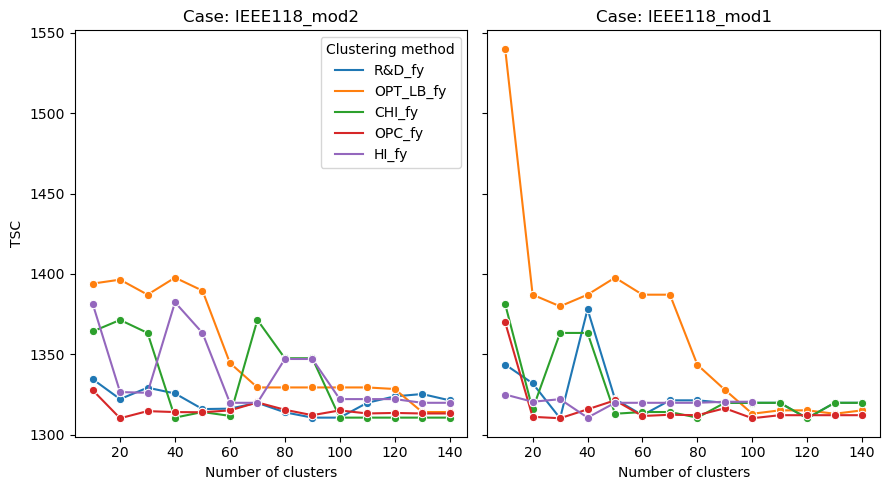

In [11]:
# Define variables
y = "TSC"
x = "Number of clusters"

# Define the different case names you want to plot
caseNames = CaseNames_Base
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(caseNames), figsize=(9, 5), sharey=True)

# Loop through each caseName and create a subplot
for i,(ax, caseName) in enumerate(zip(axes, caseNames)):
    # Select specific rows and columns from the DataFrame
    rf = results_dfs_pivot.loc[caseName].loc[["R&D_fy","OPT_LB_fy","CHI_fy","OPC_fy","HI_fy"]]
    
    # Create the line plot in the current subplot
    sns.lineplot(data=rf, x=x, y=y, hue="Clustering method", marker="o", ax=ax)
    
    # Set the title of the subplot to indicate the caseName
    ax.set_title(f"Case: {caseName}")
    
    if i != 0:
        ax.legend().remove()

# Adjust layout
plt.tight_layout()

# Optionally save the figure
#plt.savefig(f"Z.Figures/lineplot_subplots_fy_{y}.png")

# Display the plot
plt.show()